In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [15]:
a = np.array([1,2,3])
b = pd.Series(a)
b.index = ['S', 'SS', 'SSS']
np.exp(b)
b[b>2]
b.name = 'bilibili'
b.index.name = 'erciyuan'
b

S       2.718282
SS      7.389056
SSS    20.085537
dtype: float64

SSS    3
dtype: int32

erciyuan
S      1
SS     2
SSS    3
Name: bilibili, dtype: int32

In [36]:
a = pd.DataFrame([1.4, 1.55, 1.5, 3.2], index=['one', 'two', 'three', 'four'], columns=['gulu'])
a.index.name = 'number'
a.columns = ['ni']
a.name = 'kdkk'
a['dd'] = a['ni'] == 1
del a['dd']
a['ni'].T

number
one      1.40
two      1.55
three    1.50
four     3.20
Name: ni, dtype: float64

In [44]:
a = np.random.rand(2,3)
b = pd.DataFrame(a)
b.columns = ['dd', 'aa', 'cx']
b.name = 'df'
b

,dd,aa,cx
0,0.895196,0.225233,0.946159
1,0.572041,0.953908,0.993163


In [95]:
# 重置索引，可以通过重新索引来切片数据！！！
a = np.random.rand(4,6)
index1 = np.array([2000, 2001, 2002, 2003])
columns1 = np.arange(3,9)
b = pd.DataFrame(a, index=index1, columns=columns1)
c = b.reindex(index=[2000, 2003], columns=[5,6,7])
d = b[(b.index==2000)|(b.index==2003)]
b
c
d

,3,4,5,6,7,8
2000,0.997420,0.891638,0.865924,0.187375,0.553599,0.314768
2001,0.836068,0.006087,0.258285,0.921574,0.018094,0.840600
2002,0.451855,0.024799,0.869633,0.511705,0.642293,0.903044
2003,0.941151,0.454395,0.937414,0.064657,0.044803,0.945160


,5,6,7
2000,0.865924,0.187375,0.553599
2003,0.937414,0.064657,0.044803


,3,4,5,6,7,8
2000,0.997420,0.891638,0.865924,0.187375,0.553599,0.314768
2003,0.941151,0.454395,0.937414,0.064657,0.044803,0.945160


,4,5,6
2000,0.891638,0.865924,0.187375
2003,0.454395,0.937414,0.064657


In [135]:
# pandas中的iloc将numpy的花式切片变得更符合常理
a = np.random.rand(4,5)
a
b = a[[2,3], [3,4]] # numpy的花切总是返回一维的，返回(2,3)(3,4)的两个值，而不是直觉上的矩阵，转换为DataFrame.iloc则符合直觉
b
c = pd.DataFrame(a)
# loc输入的是index和columns的名称，iloc输入对应的编号，和二维数组一样的编号
# iloc输入布尔型或者数组
# 直接输入可以输入DataFrame的bool型，查找内容的值很方便
c>0.5
c[c>0.5]
c.iloc[[2,3], [3,4]]
c.loc[1,[2,3]]
c.loc[1,:][2]
c.reindex(index=np.arange(1,3), columns=[1,2,3])
d = c[(c.index>0)&(c.index<3)].T
d[(d.index>0)&(d.index<4)].T
c.iloc[(c.index>0)&(c.index<3), (c.columns>0)&(c.columns<4)]
c[[True, True, False, True]]
c.iloc[[True, True, False, True],:]
c.iloc[1,2]

array([[0.28173589, 0.67349542, 0.64287143, 0.84741605, 0.64969793],
       [0.72454327, 0.3436937 , 0.09385119, 0.98848313, 0.48110365],
       [0.1905082 , 0.82180013, 0.29153894, 0.45853928, 0.48762483],
       [0.83976258, 0.73123633, 0.81440003, 0.54476753, 0.5984613 ]])

array([0.45853928, 0.5984613 ])

,0,1,2,3,4
0,False,True,True,True,True
1,True,False,False,True,False
2,False,True,False,False,False
3,True,True,True,True,True


,0,1,2,3,4
0,NaN,0.673495,0.642871,0.847416,0.649698
1,0.724543,NaN,NaN,0.988483,NaN
2,NaN,0.821800,NaN,NaN,NaN
3,0.839763,0.731236,0.814400,0.544768,0.598461


,3,4
2,0.458539,0.487625
3,0.544768,0.598461


2    0.093851
3    0.988483
Name: 1, dtype: float64

0.09385118817756011

,1,2,3
1,0.343694,0.093851,0.988483
2,0.821800,0.291539,0.458539


,1,2,3
1,0.343694,0.093851,0.988483
2,0.821800,0.291539,0.458539


,1,2,3
1,0.343694,0.093851,0.988483
2,0.821800,0.291539,0.458539


,0,1,2,3,4
0,0.281736,0.673495,0.642871,0.847416,0.649698
1,0.724543,0.343694,0.093851,0.988483,0.481104
3,0.839763,0.731236,0.814400,0.544768,0.598461


,0,1,2,3,4
0,0.281736,0.673495,0.642871,0.847416,0.649698
1,0.724543,0.343694,0.093851,0.988483,0.481104
3,0.839763,0.731236,0.814400,0.544768,0.598461


0.09385118817756011

In [22]:
# DataFrame会根据索引进行数据对齐，比如对下列数据(1,1)(2,3)的值做平方
a = pd.DataFrame(np.random.rand(4,5))
a
b = pd.DataFrame(np.ones((4,5)), index=np.arange(1,5))
b
a+b
# 但是会出现nan值，因此可以使用DataFrame的运算方法

,0,1,2,3,4
0,0.721297,0.705229,0.247254,0.839039,0.938745
1,0.048184,0.501591,0.969356,0.337650,0.336283
2,0.632468,0.293431,0.439227,0.170459,0.987567
3,0.960120,0.321836,0.477561,0.858353,0.945803


,0,1,2,3,4
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0


,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,1.048184,1.501591,1.969356,1.337650,1.336283
2,1.632468,1.293431,1.439227,1.170459,1.987567
3,1.960120,1.321836,1.477561,1.858353,1.945803
4,NaN,NaN,NaN,NaN,NaN


In [46]:
# DataFrame的运算方法
m = np.random.rand(3,4)
a = pd.DataFrame(m)
b = pd.DataFrame(np.ones_like(m), index=np.arange(1,4), columns=np.arange(1,5))
a
b
# fill_value把两个df的缺失部分先补充上在做运算
a.add(b, fill_value=0)
a.sub(b, fill_value=0)
a.mul(b, fill_value=0)
a.div(b, fill_value=0)
a.pow(b, fill_value=0)


,0,1,2,3
0,0.415118,0.627004,0.953721,0.767253
1,0.243066,0.459134,0.157689,0.980531
2,0.244322,0.076483,0.937812,0.513911


,1,2,3,4
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0


,0,1,2,3,4
0,0.415118,0.627004,0.953721,0.767253,NaN
1,0.243066,1.459134,1.157689,1.980531,1.0
2,0.244322,1.076483,1.937812,1.513911,1.0
3,NaN,1.000000,1.000000,1.000000,1.0


,0,1,2,3,4
0,0.415118,0.627004,0.953721,0.767253,NaN
1,0.243066,-0.540866,-0.842311,-0.019469,-1.0
2,0.244322,-0.923517,-0.062188,-0.486089,-1.0
3,NaN,-1.000000,-1.000000,-1.000000,-1.0


,0,1,2,3,4
0,0.0,0.000000,0.000000,0.000000,NaN
1,0.0,0.459134,0.157689,0.980531,0.0
2,0.0,0.076483,0.937812,0.513911,0.0
3,NaN,0.000000,0.000000,0.000000,0.0


,0,1,2,3,4
0,inf,inf,inf,inf,NaN
1,inf,0.459134,0.157689,0.980531,0.0
2,inf,0.076483,0.937812,0.513911,0.0
3,NaN,0.000000,0.000000,0.000000,0.0


,0,1,2,3,4
0,1.0,1.000000,1.000000,1.000000,NaN
1,1.0,0.459134,0.157689,0.980531,0.0
2,1.0,0.076483,0.937812,0.513911,0.0
3,NaN,0.000000,0.000000,0.000000,0.0


In [47]:
import numpy as np
import matplotlib.pyplot as plt

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]])

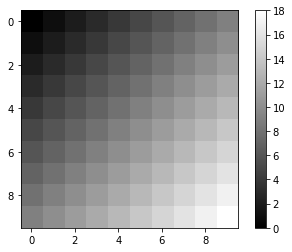

In [118]:
a = np.arange(10)
x, y = np.meshgrid(a, a)
z = x+y
z
plt.imshow(z.T, cmap=plt.cm.gray)
plt.colorbar()
